# Homework 4

In [1]:
# imports
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

from oceancolor.utils import plotting

import unyt

# [Problem 1]  Boussinesq approximation

## Consider our density and pressure fields as:

## $\rho = \rho_0 + \rho'(x,y,z,t)$

## $p = p_0(z) + p'(x,y,z,t)$

## with $p_0(z)$ indepednet of $x,y$ and satisfying:

## $\partial \rho_0 / \partial z = -g \rho_0$

## Now consider a basin with a flat bottom at $z=0$ and a height, $H+\eta(x,y)$.

## Derive expressions for $p_0(z)$ and $p'$:

## Let us start from the Hydrostatic equation:

## $\frac{\partial p}{\partial z} = - \rho g$

## As we did for the shallow water equations, we integrate from the bottom to the surface:

## $\int\limits_p^{p_a} dp = - \int\limits_z^{H+\eta} \rho g \, dz'$

## Evaluate:

## $p_a - p_0(z) - p'(x,y,z,t) = -g(H+\eta)\rho_0 + gz\rho_0 - \int\limits_z^{H+\eta} \rho' g \, dz'$ 

## Where we have inserted our expressions for $p$ and $\rho$.

## Gathering terms that are constant or depend only on $z$, we define:

## $p_0(z) = p_a + g\rho_0(H-z)$

## This leaves:

## $p'(x,y,z,t) =  g\rho_0 \eta(x,y) + \int\limits_z^{H+\eta} \rho' g \, dz'$ 

----

# [Problem 2]  Viscous Force

## Consider purely horizontal motion $\bar u = u\hat x + v \hat y$

## What direction does the viscous term, $\nu \nabla^2 \bar u$ point?

## Indeed, my intution would be for it to oppose $\bar u$

## Consider a horizontal velocity:

## $\bar u = u_0 \left ( 1 - \frac{z^2}{H^2} \right ) \hat x + u_0 \hat y$

## Evaluate the viscous term noting that $\nabla^2 \bar x = \nabla(\nabla \cdot \bar x)- \nabla \times (\nabla \times \bar x)$

## The first term is zero.

## Because only the $u_x$ term has a non scalar dependence, we have:

## $\nabla \times \bar u = 2 u_0 z / H^2 \hat y$

## And now only one term contributes again $\partial u_y / \partial z$, giving:

## $\nabla^2 \bar u = 2u_0/H^2 \hat x$

# (a) Sketch $u(z), v(z)$:

In [11]:
def calcuv(z, H=5, u0=1):
    u = u0 * (1-z**2/H**2)
    try:
        v = u0 * np.ones(len(z))
    except:
        v = u0
    return u,v

In [6]:
zs = np.linspace(0., -5., 1000)
us, vs = calcuv(zs)

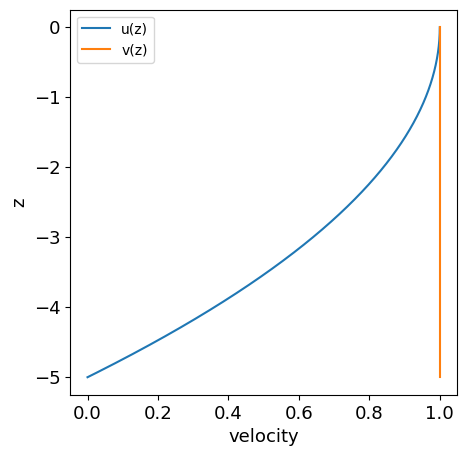

In [8]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

ax.plot(us, zs, label='u(z)')
ax.plot(vs, zs, label='v(z)')
#
ax.set_xlabel('velocity')
ax.set_ylabel('z')
ax.legend()
#
plotting.set_fontsize(ax,13)
plt.show()

# (b) Now sketch the vectors $\bar u$ and $\nabla^2 \bar u$

In [13]:
u0, v0 = calcuv(0.)
uH, vH = calcuv(-5.)

In [16]:
u0, v0

(1.0, 1)

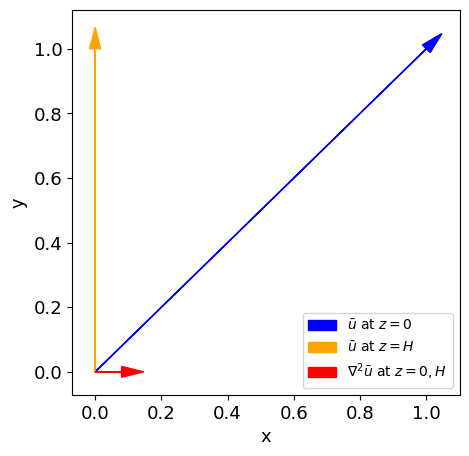

In [22]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

f = 3.
arrow = plt.arrow(0, 0, u0, v0, color='blue', head_width=0.1/f, head_length=0.2/f, label=r'$\bar u$ at $z=0$')
arrow = plt.arrow(0, 0, uH, vH, color='orange', head_width=0.1/f, head_length=0.2/f, label=r'$\bar u$ at $z=H$')

arrow = plt.arrow(0, 0, 2/5**2, 0, color='red', head_width=0.1/f, head_length=0.2/f, label=r'$\nabla^2 \bar u$ at $z=0,H$')

#
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
#
plotting.set_fontsize(ax,13)
plt.show()

----

# [Problem 3] Potential vorticity